Predicted tip for total bill of $30: 3.99


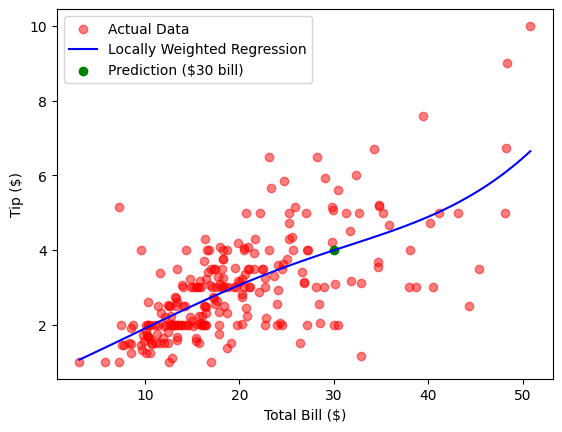

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "10-dataset.csv"
tips = pd.read_csv(file_path)
X = tips["total_bill"].values
y = tips["tip"].values

def local_weight(x_query, X, y, tau):
    m = len(X)
    weights = np.exp(-((X - x_query) ** 2) / (2 * tau ** 2))
    X_b = np.c_[np.ones(m), X]
    W = np.diag(weights)
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ (X_b.T @ W @ y)
    x_query_b = np.array([1, x_query])
    return x_query_b @ theta

tau = 10
x_query = 30
predicted_tip = local_weight(x_query, X, y, tau)

print(f"Predicted tip for total bill of $30: {predicted_tip:.2f}")

X_range = np.linspace(X.min(), X.max(), 100)
y_pred = np.array([local_weight(x, X, y, tau) for x in X_range])

plt.scatter(X, y, color='red', alpha=0.5, label="Actual Data")
plt.plot(X_range, y_pred, color='blue', label="Locally Weighted Regression")
plt.scatter([x_query], [predicted_tip], color='green', marker='o', label="Prediction ($30 bill)")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend()
plt.show()
